# Time complexity - toy model

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import time
from tqdm import tqdm

%matplotlib inline

In [2]:
sys.path.append('../../../../stationsim/')
from stationsim_gcs_model import Model

## Paths

In [3]:
results_dir = '../results/toy_model/model/'

## Constants

In [4]:
# Number of repeats for each model
N = 100

# List of population sizes
pop_sizes = [2**i for i in range(10)]

## Run experiments

In [5]:
results = list()

In [6]:
model_params = {'station': None,
                'do_print': False}

In [7]:
for pop_size in pop_sizes:
    print(f'p={pop_size}')
    model_params['pop_total'] = pop_size
    
    
    for _ in tqdm(range(N)):
        start = time.perf_counter()
        m = Model(**model_params)
        while m.status:
            m.step()
        
        stop = time.perf_counter()
        diff = stop - start
        d = {'pop_size': pop_size,
             't': diff / N}
        results.append(d)

  0%|          | 0/100 [00:00<?, ?it/s]

p=1


  1%|          | 1/100 [00:00<00:15,  6.26it/s]

p=2


  1%|          | 1/100 [00:00<00:12,  8.15it/s]

p=4


  0%|          | 0/100 [00:00<?, ?it/s]

p=8


  0%|          | 0/100 [00:00<?, ?it/s]

p=16


  0%|          | 0/100 [00:00<?, ?it/s]

p=32


  0%|          | 0/100 [00:00<?, ?it/s]

p=64


  0%|          | 0/100 [00:00<?, ?it/s]

p=128


 73%|███████▎  | 73/100 [34:00<12:34, 27.96s/it]


KeyboardInterrupt: 

## Process results

In [8]:
results = pd.DataFrame(results)

In [9]:
results.head()

,pop_size,t
0,1,0.002331
1,1,0.000902
2,1,0.000713
3,1,0.000569
4,1,0.000253


In [10]:
results.to_csv(results_dir+'output.csv', index=False)

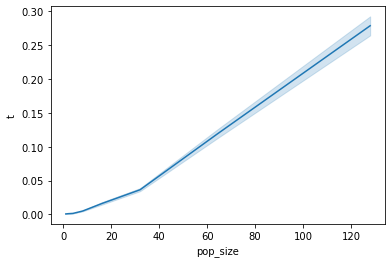

In [11]:
plt.figure()
sns.lineplot(x='pop_size', y='t', data=results)
plt.show()